# Spline interpolacion
  

In [1]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import solve
%matplotlib inline
import sympy as sp
#REF: Adaptado de  https://github.com/rrgalvan

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$

In [2]:
x0, x1, x2 = -1, 0, 1
_x = np.array([x0, x1, x2])
y0, y1, y2 =  5, 3, 3
_y = np.array([y0, y1, y2])

## sympy para resolver aquel sistema de ecuaciones

Para calcular los splines cúbicos debemos resolver el sistema de ecuaciones que define los coeficientes de los polinomios cúbicos en los subintervalos $[-1,0]$ y $[0,1]$. Empleando las condiciones del metodo de spline, y defiendo los polinomios para garantizar la continuidad en cada unos de los puntos, tenemos que:

Sean:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$,

es decir:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3$,
  * $s_1(x) = a_1 + b_1 x + c_1 x^2 + d_1 x^3$.

Entonces
  * $s_0'(x) =  b_0 + 2 c_0 (x+1) + 3 d_0 (x+1)^2$,
  * $s_0''(x) = 2 c_0 + 6 d_0 (x+1)$,
  * $s_1'(x) =  b_1 + 2 c_1 x + 3 d_1 x^2$,
  * $s_1''(x) = 2 c_1 + 6 d_1 x$.

Tenemos 8 incógnitas, $a_i$, $b_i$, $c_i$, $d_i$ con $i=0,1$. Las ecuaciones son:

  * Interpolación (y continuidad en 0):

    * $s_0(-1) = 5$, es decir, $a_0=5$.
    * $s_0(0)  = 3$, es decir, $a_0+b_0+c_0+d_0=3$.
    * $s_1(0) = 3$, es decir, $a_1=3$.
    * $s_1(1)  = 3$, es decir, $a_1+b_1+c_1+d_1=3$.
    
  * Derivabilidad:

    * $s_0'(0) = s_1'(0)$, es decir, $b_0+2c_0+3d_0 = b_1$.
    * $s_0''(0) = s_1''(0)$, es decir, $2c_0+6d_0 = 2c_1$.

  * Condiciones naturales en los extremos, $-1$ y $1$:

    * $s_0''(-1) = 0$, es decir, $2c_0=0$.
    * $s_1''(1) = 0$, o sea $2c_1+6d_1=0$.


De estas ecuaciones tenemos directamente $a_0$, $a_1$, y $c_1$. Le damos valores a las variables en python:

In [ ]:
a0 = 5
a1 = 3
c0 = 0

Así, podemos eliminar la primera, tercera y séptima ecuación, llegando a un sistema de cinco ecuaciones con cinco incógnitas ($b_0$, $d_0$, $b_1$, $c_1$, $d_1$):

 * $b_0+d_0=3-a_0-c_0=-2$,
 * $b_1+c_1+d_1=3-a_1=0$,
 * $b_0+3d_0 - b_1 = -2c_0 = 0$,
 * $6d_0 - 2c_1 = -2c_0=0$
 * $2c_1+6d_1=0$


La matriz y el segundo miembro asociados son:

In [ ]:
A = np.array([
	[ 1, 1,   0,  0, 0],
	[ 0, 0,   1,  1, 1],
	[ 1, 3,  -1,  0, 0],
	[ 0, 6,   0, -2, 0],
	[ 0, 0,   0,  2, 6]])
b = np.array([-2, 0, 0, 0, 0])

In [ ]:
sol = solve(A,b)
print(sol)

[-2.5  0.5 -1.   1.5 -0.5]


Ahora podemos resolver este sistema usando la función `solve()` (incluida en el modulo "linalg" del paquete *numpy*):

In [ ]:
sol = solve(A,b)
 #Definimos la solución como variables b0, d0, b1, c1 y d1
b0, d0, b1, c1, d1 = sol

  #Y mostramos los resultados
print ("a0, b0, c0, d0 = %f, %f, %f, %f" % (a0, b0, c0, d0))
print ("a1, b1, c1, d1 = %f, %f, %f, %f" % (a1, b1, c1, d1))

a0, b0, c0, d0 = 5.000000, -2.500000, 0.000000, 0.500000
a1, b1, c1, d1 = 3.000000, -1.000000, 1.500000, -0.500000


Para dibujar la gráfica, lo más fácil es definir los polinomios $s_0$ y $s_1$ y representarlos gráficamente.

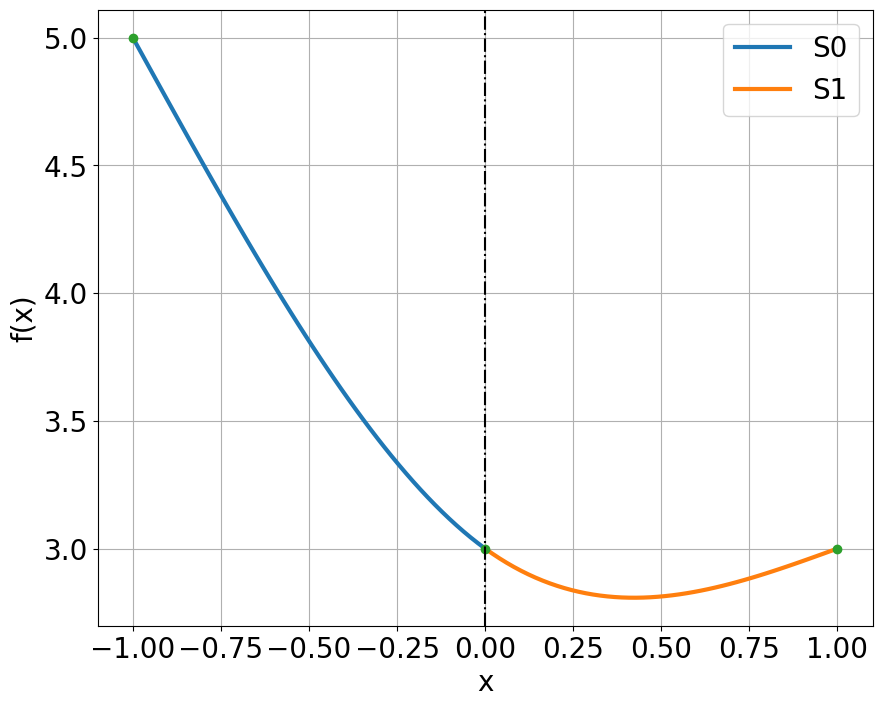

In [ ]:
def s0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3
def s1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3

xx0 = np.linspace(-1,0)
xx1 = np.linspace(0,1)

plt.figure(figsize=(10, 8))
plt.plot(xx0, s0(xx0), lw=3, label = "S0")
plt.plot(xx1, s1(xx1), lw=3, label = "S1")
plt.plot(_x, _y, 'o')
plt.axvline(color = "k", ls="-.")
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "upper right", fontsize= 20)
plt.grid()
plt.show()

Spline cubico que interpola los puntos.
$ H = \left\{(x,y)\in ℝ^{2} : (-1,5),(0,3),(1,3),(2,7)    \right\}$

Entonces, se requiere los polinomios:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$,
  * $s_2(x) = a_2 + b_2( x - x_2) + c_2 ( x - x_2)^{2} + d_2(x-x_2)^{3}$.

  
  Considerando el conjunto H, se obtiene:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3$,
  * $s_1(x) = a_1 + b_1x + c_1x^2 + d_1 x^3$,
  * $s_2(x) = a_2 + b_2( x - 1) + c_2 ( x - 1)^{2} + d_2(x-1)^{3}$
  






In [ ]:
h_x = np.array([-1,0,1,2])
h_y = np.array([5,3,3,7])
A1 = np.array([
    [1,1,0,0,0,0,0],
    [0,0,1,1,1,0,0],
    [0,0,0,0,0,-1,-1],
    [0,3,-1,0,0,0,0],
    [0,6,0,-2,0,0,0],
    [0,0,1,2,3,-1,-2],
    [0,0,0,2,6,0,6]
   ])
b1 = np.array([-2,0,-4,0,0,0,0])
sol2 = solve(A1,b1)
print(sol2)
a0,a1,a2 = 5,3,3
c0,c2 = 0,0
b0,d0,b1,c1,d1,b2,d2 = sol2
print ("a0, b0, c0, d0 = %f, %f, %f, %f" % (a0, b0, c0, d0))
print ("a1, b1, c1, d1 = %f, %f, %f, %f" % (a1, b1, c1, d1))
print ("a2, b2, c2, d2 = %f, %f, %f, %f" % (a2, b2, c2, d2))


[-1.71428571 -0.28571429 -0.85714286 -0.85714286  1.71428571  5.42857143
 -1.42857143]
a0, b0, c0, d0 = 5.000000, -1.714286, 0.000000, -0.285714
a1, b1, c1, d1 = 3.000000, -0.857143, -0.857143, 1.714286
a2, b2, c2, d2 = 3.000000, 5.428571, 0.000000, -1.428571


Obteniendo así los polinomios
\begin{equation}
s_{0} = 5 -1.71(x+1) -0.29(x+1)^{3}
\end{equation}
\begin{equation}
s_{1} = 3 -0.86x -0.86x^{2} + 1.71x^{3}
\end{equation}
\begin{equation}
s_{2} = 7 +5.43(x-1) -1.43(x-1)^{3}
\end{equation}


In [ ]:
### Para graficar aquellos polinomios lo volvemos una función
x = sp.Symbol("x")
s0 = a0 + b0 * ( x + 1) +c0*(x+1)**2+ d0 * ( x + 1) ** 3
s1 = a1  + b1 * x + c1 * x ** 2 + d1 * x ** 3
s2 = a2 + b2 * ( x - 1) + c2 * (x - 1) ** 2 + d2 * ( x - 1) ** 3
s0,s1,s2 = sp.lambdify(x,s0,"numpy"), sp.lambdify(x,s1,"numpy"),sp.lambdify(x,s2,"numpy")
s0(0)

3.000000000000004

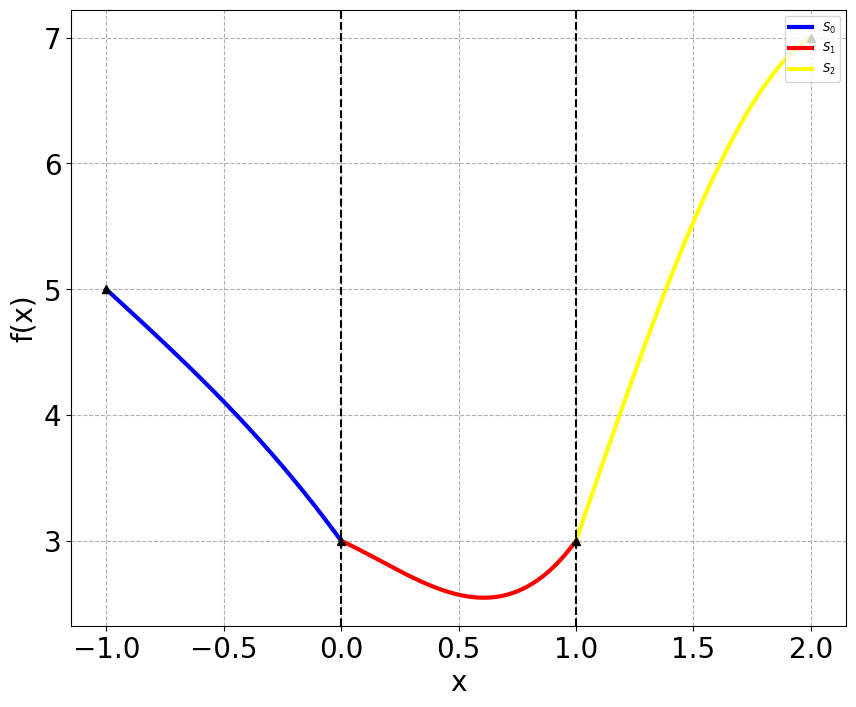

In [ ]:
### Cada conjunto del dominio.
dom1 = np.linspace(-1,0,200)
dom2 = np.linspace(0,1,200)
dom3 = np.linspace(1,2,200)
plt.figure(figsize=(10, 8))
plt.plot(dom1, s0(dom1), lw=3, label = r"$S_{0}$", color = "blue")
plt.plot(dom2,s1(dom2), lw=3, label = r"$S_{1}$", color = "red")
plt.plot(dom3,s2(dom3),lw = 3, label = r"$S_{2}$", color = "yellow")
plt.plot(h_x,h_y, '^', color = "black")
plt.axvline(color = "k", ls="--")
plt.axvline(1,color = "k", ls="--")
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "upper right", fontsize = "small")
plt.grid(True, ls = "dashed")
plt.show()